
Ejemplo 1_Pruebas A/B

**Planteamiento del problema:** 
En todas las escuelas de Educación Básica, en los niveles de 3º de secundaria, se ha planteado y aplicado durante los últimos dos años una estrategia para matemáticas con el uso de tecnología entre dos grupos, uno de control y uno experimental. Se obtiene los puntajes de cada grupo en una escala de cien, sobre dos pruebas, una estandarizada y una instrumental basada en el uso de las herramientas TIC. ¿Existe evidencia suficente para sustentar que la estrategia de matemáticas con tecnología es más eficiente para la enseñanza de la misma y mejora el puntaje obtenido en las pruebas matemáticas significativamente?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/DEBU/Prueba A B Estrategia Matemática con TIC/Estrategia_Matemática_ok.csv')

df

,test,puntaje_prueba_estandarizada,puntaje_prueba_TIC
0,B,89,92
1,A,68,56
2,A,99,62
3,A,88,14
4,A,44,73
...,...,...,...
46322,B,85,28
46323,B,74,23
46324,B,45,38
46325,A,74,61


Agrupamos nuestros resultados por 'test', para conocer el promedio que arrojó cada una de las pruebas:

In [ ]:
mean_test = df.groupby('test')[['puntaje_prueba_estandarizada', 'puntaje_prueba_TIC']].mean()

mean_test

,puntaje_prueba_estandarizada,puntaje_prueba_TIC
test,,
A,50.058006,49.948018
B,49.929210,49.982734


Obtenemos la proporción de éxito en la mejora de los promedios

In [ ]:
mean_test['success rate'] = mean_test['puntaje_prueba_estandarizada'] / (mean_test['puntaje_prueba_estandarizada'] + mean_test['puntaje_prueba_TIC'])

mean_test

,puntaje_prueba_estandarizada,puntaje_prueba_TIC,success rate
test,,,
A,50.058006,49.948018,0.500550
B,49.929210,49.982734,0.499732


Con estos datos parece que no hay diferencias significativas. Continuemos el análisis.

In [ ]:
diferencia_en_proporcion = 1 - (mean_test.loc['B']['success rate'] / mean_test.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

In [ ]:
print(f'El test A fue {diferencia_en_porcentaje:.4f}% más efectivo que el test B para la enseñanza de las matemáticas y mejorar el puntaje obtenido en la prueba matemática de referencia.')

El test A fue 0.1634% más efectivo que el test B para la enseñanza de las matemáticas y mejorar el puntaje obtenido en la prueba matemática de referencia.


¿Ahora, podemos entonces concluir que la estrategia matemática con TIC A es mejor que la B? Vamos a aplicar un test de permutación para saber si nuestro hallazgo es estadísticamente significativo.

Primero tenemos que mezclar las mediciones del test A y el B en el mismo DataFrame. Esto ya está hecho, entonces solamente vamos a eliminar la columna 'test' para que no haya manera de diferenciarlos:

In [ ]:
all_measurements = df[['puntaje_prueba_estandarizada', 'puntaje_prueba_TIC']]
all_measurements

,puntaje_prueba_estandarizada,puntaje_prueba_TIC
0,89,92
1,68,56
2,99,62
3,88,14
4,44,73
...,...,...
46322,85,28
46323,74,23
46324,45,38
46325,74,61


Se cualcula cuántos tests con la estrategia matemática A hubieron para poder generar muestras del mismo tamaño exactamente:

In [ ]:
value_counts = df['test'].value_counts()

value_counts

A    23739
B    22588
Name: test, dtype: int64

#Test de permutación

Procedimiento


1.   Usando muestreo aleatorio sin reposición, construir un nuevo grupo A del mismo tamaño que el original.
2.   El resto de los datos conforman nuestro nuevo grupo B.
3. Cuantificar la **métrica o estadística que se calculó con los grupos originales** y guardar el resultado.
4. Repetir los pasos 1-5 R veces para obtener una distribución de la estadística de interés.



In [ ]:
#Prueba de permutación
mean_a = []
no_mean_a = []
mean_b = []
no_mean_b = []

value_counts = df['test'].value_counts ()

for i in range(1000):
    a = df.sample(value_counts.loc['A'], replace=False)
    mean_a.append(a['puntaje_prueba_estandarizada'].mean())
    no_mean_a.append(a['puntaje_prueba_TIC'].mean())
    
    b = df.loc[~df.index.isin(a.index)]
    mean_b.append(b['puntaje_prueba_estandarizada'].mean())
    no_mean_b.append(b['puntaje_prueba_TIC'].mean())

In [ ]:
perm_results = pd.DataFrame({
    'mean_a': mean_a,
    'no_mean_a': no_mean_a,
    'mean_b': mean_b,
    'no_mean_b': no_mean_b
})

perm_results

,mean_a,no_mean_a,mean_b,no_mean_b
0,50.002696,49.939762,49.987338,49.991411
1,49.887148,49.993429,50.108775,49.935010
2,50.159653,49.849362,49.822384,50.086418
3,50.193858,50.197018,49.786435,49.721047
4,50.082312,49.933232,49.903666,49.998273
...,...,...,...,...
995,49.862884,49.934201,50.134275,49.997255
996,49.863937,49.855217,50.133168,50.080264
997,50.105059,49.839631,49.879759,50.096644
998,49.900417,50.035090,50.094829,49.891225


In [ ]:
perm_results['a_mean_rate'] = perm_results['mean_a'] / (perm_results['mean_a'] + perm_results['no_mean_a'])
perm_results['b_mean_rate'] = perm_results['mean_b'] / (perm_results['mean_b'] + perm_results['no_mean_b'])

In [ ]:
perm_results

,mean_a,no_mean_a,mean_b,no_mean_b,a_mean_rate,b_mean_rate
0,50.002696,49.939762,49.987338,49.991411,0.500315,0.499980
1,49.887148,49.993429,50.108775,49.935010,0.499468,0.500868
2,50.159653,49.849362,49.822384,50.086418,0.501551,0.498679
3,50.193858,50.197018,49.786435,49.721047,0.499984,0.500329
4,50.082312,49.933232,49.903666,49.998273,0.500745,0.499526
...,...,...,...,...,...,...
995,49.862884,49.934201,50.134275,49.997255,0.499643,0.500684
996,49.863937,49.855217,50.133168,50.080264,0.500044,0.500264
997,50.105059,49.839631,49.879759,50.096644,0.501328,0.498915
998,49.900417,50.035090,50.094829,49.891225,0.499326,0.501018


In [ ]:
perm_results['diff'] = 1 - (perm_results['b_mean_rate'] / perm_results['a_mean_rate'])

perm_results

,mean_a,no_mean_a,mean_b,no_mean_b,a_mean_rate,b_mean_rate,diff
0,50.002696,49.939762,49.987338,49.991411,0.500315,0.499980,0.000670
1,49.887148,49.993429,50.108775,49.935010,0.499468,0.500868,-0.002804
2,50.159653,49.849362,49.822384,50.086418,0.501551,0.498679,0.005728
3,50.193858,50.197018,49.786435,49.721047,0.499984,0.500329,-0.000689
4,50.082312,49.933232,49.903666,49.998273,0.500745,0.499526,0.002434
...,...,...,...,...,...,...,...
995,49.862884,49.934201,50.134275,49.997255,0.499643,0.500684,-0.002085
996,49.863937,49.855217,50.133168,50.080264,0.500044,0.500264,-0.000440
997,50.105059,49.839631,49.879759,50.096644,0.501328,0.498915,0.004812
998,49.900417,50.035090,50.094829,49.891225,0.499326,0.501018,-0.003388


Estos son resultados, a continuación de identifica dónde cae en nuestra distribución el resultado que obtuvimos en el experimento:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


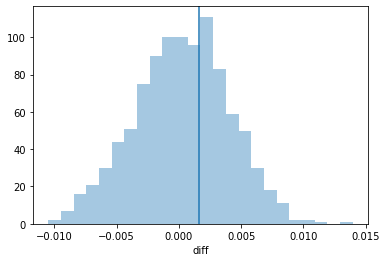

In [ ]:
sns.distplot(perm_results['diff'], kde=False, norm_hist=False)

plt.axvline(diferencia_en_proporcion);

Se obtien por último el Valor P para cuantificar numéricamente nuestro resultado:

In [ ]:
(perm_results['diff'] >= diferencia_en_proporcion).mean() / perm_results.shape[0]

0.000379

**Interpretación:**

Este valor puede interpretarse como que en realidad no hubo una diferencia significativa en la estretegia matemática con Tecnología para mejorar los resultados en los puntajes entre las pruebas matemáticas. El conjunto de datos analizado no arrojó evidencia sufiente para sustentar que la estrategia matemática con tecnología resulta una estrategia que mejore significativamente la enseñanza y los puntajes en las pruebas matemátic, tanto la estandarizada como la que está orientada con el uso de TIC.